In [4]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [6]:
emails=pd.read_csv('emails.csv')

In [7]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
emails.get_value(58,'text')

C:\Users\Bhavana\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'Subject: did you complete this ?  free service  mortgage rates have never been lower .  is your credit good ? get a loan beyond your wildest  expectations !  click here  your credit stinks ? lenders  will still give you an absolutely amazing loan .  click here  just click here and get started .  absolutely free quote .  click  here for quick details ! '

In [10]:
emails.shape

(5728, 2)

In [11]:
emails.groupby('spam').count()

,text
spam,
0,4360
1,1368


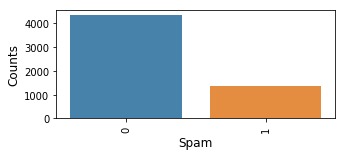

In [15]:
label_counts=emails.spam.value_counts()
plt.figure(figsize = (5,2))
sb.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [16]:
emails['length']=emails['text'].map(lambda text: len(text))
emails.groupby('spam').length.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
0,4360.0,1631.918119,1959.664549,13.0,577.75,1122.0,2037.25,43952.0
1,1368.0,1317.257310,2271.372893,18.0,401.50,693.5,1250.25,28432.0


In [17]:
emails_subset=emails[emails.length<1800]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001818032A7F0>,
      dtype=object)

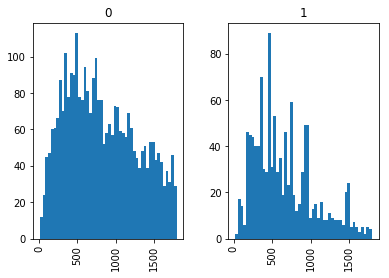

In [18]:
emails_subset.hist(column='length',by='spam',bins=50)

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhavana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bhavana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [21]:
emails['tokens'] = emails['text'].map(lambda text:  nltk.tokenize.word_tokenize(text))

In [24]:
stop_words = set(nltk.corpus.stopwords.words('english'))
emails['filtered_text'] = emails['tokens'].map(lambda tokens: [w for w in tokens if not w in stop_words]) 

In [25]:
emails['filtered_text'] = emails['filtered_text'].map(lambda text: text[2:])

In [26]:
print(emails['tokens'][3],end='\n\n')
print(emails['filtered_text'][3])

['Subject', ':', '4', 'color', 'printing', 'special', 'request', 'additional', 'information', 'now', '!', 'click', 'here', 'click', 'here', 'for', 'a', 'printable', 'version', 'of', 'our', 'order', 'form', '(', 'pdf', 'format', ')', 'phone', ':', '(', '626', ')', '338', '-', '8090', 'fax', ':', '(', '626', ')', '338', '-', '8102', 'e', '-', 'mail', ':', 'ramsey', '@', 'goldengraphix', '.', 'com', 'request', 'additional', 'information', 'now', '!', 'click', 'here', 'click', 'here', 'for', 'a', 'printable', 'version', 'of', 'our', 'order', 'form', '(', 'pdf', 'format', ')', 'golden', 'graphix', '&', 'printing', '5110', 'azusa', 'canyon', 'rd', '.', 'irwindale', ',', 'ca', '91706', 'this', 'e', '-', 'mail', 'message', 'is', 'an', 'advertisement', 'and', '/', 'or', 'solicitation', '.']

['4', 'color', 'printing', 'special', 'request', 'additional', 'information', '!', 'click', 'click', 'printable', 'version', 'order', 'form', '(', 'pdf', 'format', ')', 'phone', ':', '(', '626', ')', '338',

In [27]:
emails['filtered_text'] = emails['filtered_text'].map(lambda text: ' '.join(text))
emails['filtered_text'] = emails['filtered_text'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

In [30]:
wnl = nltk.WordNetLemmatizer()
emails['filtered_text'] = emails['filtered_text'].map(lambda text: wnl.lemmatize(text))

In [31]:
emails['filtered_text'][4]

'money get software cds software compatibility great grow old along best yet tradgedies finish death comedies ended marriage '

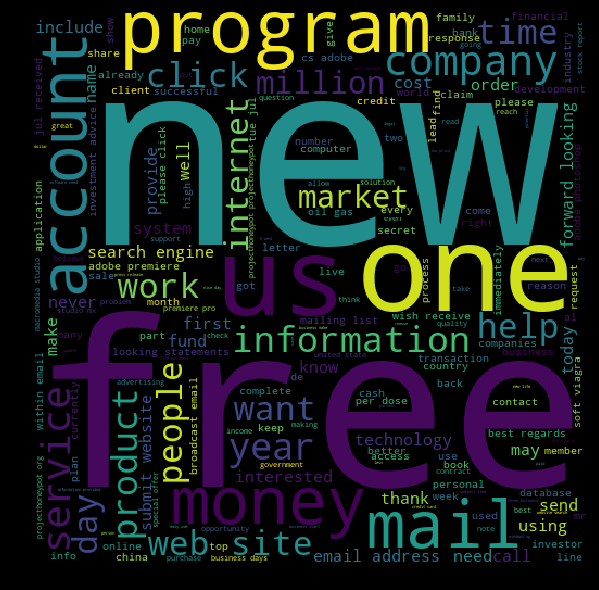

In [34]:
spam_words = ''.join(list(emails[emails['spam']==1]['filtered_text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


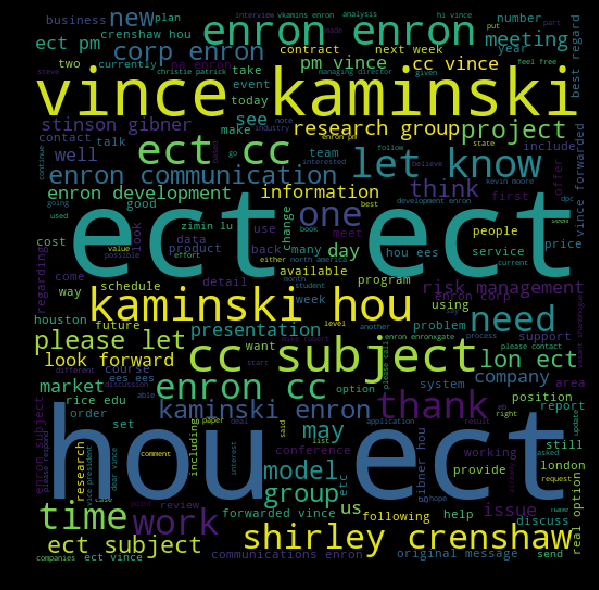

In [35]:
spam_words = ''.join(list(emails[emails['spam']==0]['filtered_text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [36]:
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(emails['filtered_text'].values)
print(counts.shape)

(5728, 37158)


In [37]:
classifier = MultinomialNB()
targets = emails['spam'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
examples = ['cheap free money', "Forwarding you minutes of meeting "]
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
print(predictions)

[1 0]


In [39]:
#tf-idf
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf = tfidf_vectorizer.transform(counts)
print(tfidf.shape)
classifier = MultinomialNB()
targets = emails['spam'].values
classifier.fit(counts, targets)
examples = ['Free Offer Buy now',"Lottery send money today","Please send the files"]
example_counts = count_vectorizer.transform(examples)
example_tfidf = tfidf_vectorizer.transform(example_counts)
predictions_tfidf = classifier.predict(example_tfidf)
print(predictions_tfidf)

(5728, 37158)
[1 1 0]
